In [1]:
import pandas as pd

In [2]:
path = '/Users/student/Downloads/'

path = '/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/target_lists/' #Dax's path on his machine

import os,sys
sys.path.append(path)

targets = pd.read_csv(path+'SRMP_target_list_A_blind_search_Kylor.csv')
targets = pd.read_csv(path+'SRMP_target_list_B_blind_search_Thamim.csv')
targets = pd.read_csv(path+'SRMP_target_list_C_blind_search_Shreeya.csv')

In [3]:
targets

,TIC ID,Notes,Planet Radius (Earth Radii),Period (days),Transit Duration (Hours),Signal Detection Efficiency (SDE),Classification,Observed Sectors [String],N Sectors Observed,dist,...,R_star,rho,Tmag,Vmag,Gmag,rmag,imag,Zmag,Hmag,Kmag
0,198385543,NaN,NaN,NaN,NaN,NaN,NaN,"Sector 16, Sector 17, Sector 20, Sector 23, Se...",7.0,47.24960,...,0.41000,5.80494,11.8467,13.971,12.9919,NaN,NaN,NaN,9.804,9.596
1,329620803,NaN,NaN,NaN,NaN,NaN,NaN,"Sector 15, Sector 16",2.0,74.14383,...,0.28000,5.62104,11.5618,13.696,12.7040,NaN,NaN,NaN,9.530,9.338
2,25266623,NaN,NaN,NaN,NaN,NaN,NaN,Sector 15,1.0,20.02870,...,0.28500,9.26011,10.9047,13.536,12.1983,NaN,NaN,NaN,8.659,8.449
3,199503082,NaN,NaN,NaN,NaN,NaN,NaN,Sector 23,1.0,31.95100,...,0.25700,11.49890,12.3307,15.400,13.6452,14.3936,13.2852,12.1291,10.076,9.787
4,421335923,NaN,NaN,NaN,NaN,NaN,NaN,"Sector 14, Sector 15, Sector 16, Sector 17, Se...",6.0,33.33360,...,0.30000,8.18218,11.6183,13.795,12.7752,NaN,NaN,NaN,9.572,9.367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,391490853,NaN,NaN,NaN,NaN,NaN,NaN,Sector 19,1.0,21.12860,...,0.18600,24.47310,12.5806,15.512,13.9776,NaN,NaN,NaN,10.273,9.960
457,397059352,NaN,NaN,NaN,NaN,NaN,NaN,Sector 23,1.0,25.13680,...,0.19700,17.75010,12.4181,15.239,13.7605,NaN,NaN,NaN,10.229,9.891
458,284441182,NaN,NaN,NaN,NaN,NaN,NaN,"Sector 17, Sector 18, Sector 24",3.0,51.95030,...,0.49012,4.14664,11.4752,13.459,12.5555,NaN,NaN,NaN,9.514,9.283
459,287254711,NaN,NaN,NaN,NaN,NaN,NaN,"Sector 14, Sector 21",2.0,23.08060,...,0.18800,22.26240,12.3976,15.033,13.7162,NaN,NaN,NaN,10.256,10.021


In [4]:
import matplotlib.pyplot as plt

In [5]:
targets.columns

Index(['TIC ID', 'Notes', 'Planet Radius (Earth Radii)', 'Period (days)',
       'Transit Duration (Hours)', 'Signal Detection Efficiency (SDE)',
       'Classification', 'Observed Sectors [String]', 'N Sectors Observed',
       'dist', 'ra', 'dec', 'eclat', 'eclong', 'Teff', 'logg', 'M_star',
       'R_star', 'rho', 'Tmag', 'Vmag', 'Gmag', 'rmag', 'imag', 'Zmag', 'Hmag',
       'Kmag'],
      dtype='object')

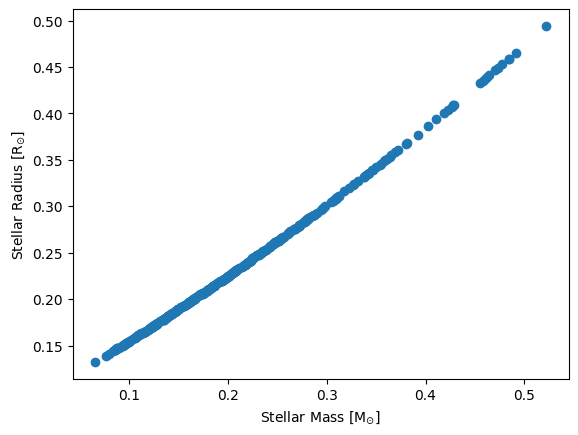

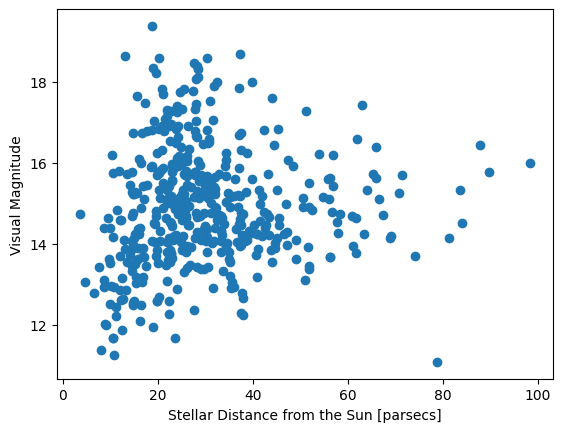

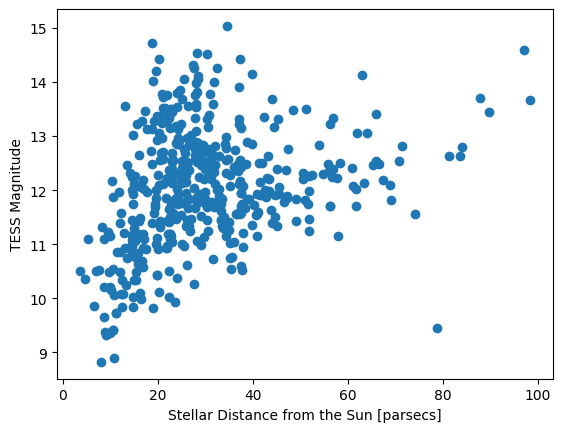

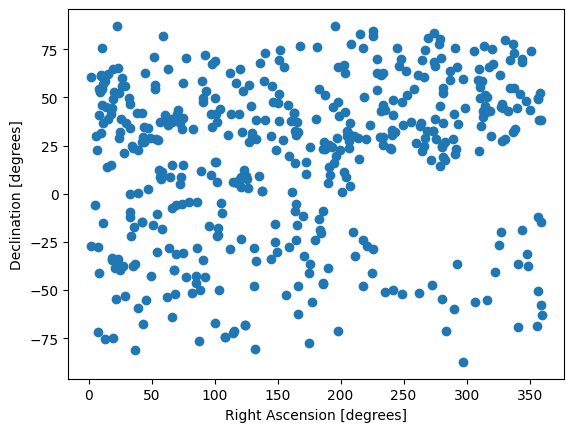

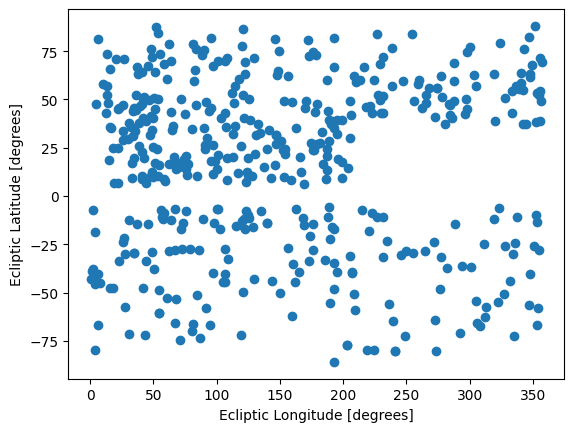

In [6]:
plt.scatter( targets['M_star'], targets['R_star'] )
plt.xlabel('Stellar Mass [M$_{\odot}$]')
plt.ylabel('Stellar Radius [R$_{\odot}$]')
plt.show()

plt.scatter( targets['dist'], targets['Vmag'] )
plt.xlabel('Stellar Distance from the Sun [parsecs]')
plt.ylabel('Visual Magnitude')
plt.show()

plt.scatter( targets['dist'], targets['Tmag'] )
plt.xlabel('Stellar Distance from the Sun [parsecs]')
plt.ylabel('TESS Magnitude')
plt.show()

plt.scatter( targets['ra'], targets['dec'] )
plt.xlabel('Right Ascension [degrees]')
plt.ylabel('Declination [degrees]')
plt.show()

plt.scatter( targets['eclong'], targets['eclat'] )
plt.xlabel('Ecliptic Longitude [degrees]')
plt.ylabel('Ecliptic Latitude [degrees]')
plt.show()

# Now that we have looked our targets in a few parameter spaces: size, brightness, spatial coordinates,
## (Are there more that might be interesting to look into?)

# We can construct a for loop that will perform transit searches with our pipeline on each target star in our list

In [7]:
# pipeline settings

# if you want to run search straight from code keep lines below uncommented, otherwise comment below as noted

# comment this below if you don't want result from code
path= '/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/'
import os,sys
sys.path.append(path)
from lightcurve_practice_code import pipeline,phasefold_version2
# comment this above if you don't want result from code

author='SPOC'
save_directory=os.getcwd()+'/SRMP_Research/'

if os.path.exists(save_directory)==False:
    os.mkdir(save_directory)
else:
    print(save_directory,'exists!')

Sector=None #use all sectors available

#selecting photometry settings
mask_threshold=5
nsigma=2

#selecting smoothing settings
window_size_in_days=None
filter_type='biweight'

#selecting period range to search over
min_period=0.5
max_period=27*2/3


#selection duration range to search over
oversampling_factor=9
duration_grid_step=1.05


#debugging mode
verbose=True

from lightkurve.search import SearchError

/Users/daxfeliz/Desktop/Mentoring_Teaching/SRMP_project/2024_SRMP/SRMP_Research/ exists!


In [8]:
# overwrite=True


# for t in range(5):#len(targets)):
#     target = targets.iloc[t]
#     ID = target['TIC ID']
    
#     starname ='TIC '+str(int(ID)) ; Sector=None
#     starname2='TIC_'+str(int(ID))

    
#     # sanity checks commented below (these should work!)
#     # starname='TIC 261136679'; Sector=1 #'Pi Mensae'
#     # starname='TIC 100100827'; Sector=2 #wasp 18b
    
#     print('file ',t,': ',starname)    
#     if overwrite==False:
#         # check if output files exist
#         filename1 = save_directory+starname2+'_BLS_result.png'
#         filename2 = save_directory+starname2+'_BLS_result.csv'
#         if os.path.isfile(filename1)==True:    
#             if os.path.isfile(filename2)==True:
#                 print('Both BLS files for',starname,'exist! Moving onto next target!')
#                 print(' ')
#                 continue
#             else:
#                 print('No BLS CSV File... ReRunning to create!')
#                 print(' ')
        
#                 try:
#                     output_lc, planet_period, planet_t0, planet_dur = pipeline(starname, author, Sector, 
#                                                                                mask_threshold, nsigma, save_directory,
#                                                                                window_size_in_days,filter_type,
#                                                                                min_period,max_period, oversampling_factor,
#                                                                                duration_grid_step,verbose)
#                 except (TypeError,ValueError,AttributeError) as e:
#                     print('PROBLEM! SEE ERROR BELOW FOR FILE',t,':',starname)
#                     print(e)
#                     print('PROBLEM! SEE ERROR ABOVE FOR FILE',t,':',starname)      
#                     print('================')
#                     print('================')   
#                     print('')
#                     continue
#     else:
        
#         try:
#             output_lc, planet_period, planet_t0, planet_dur = pipeline(starname, author, Sector, 
#                                                                        mask_threshold, nsigma, save_directory,
#                                                                        window_size_in_days,filter_type,
#                                                                        min_period,max_period, oversampling_factor,
#                                                                        duration_grid_step,verbose)
#         except (TypeError,ValueError,AttributeError) as e:
#             print('PROBLEM! SEE ERROR BELOW FOR FILE',t,':',starname)
#             print(e)
#             print('PROBLEM! SEE ERROR ABOVE FOR FILE',t,':',starname)      
#             print('================')
#             print('================')   
#             print('')
#             continue

In [ ]:
from astroquery.mast import Catalogs

t=0
target = targets.iloc[t]
ID = target['TIC ID']

TIC_ID = ID
result = Catalogs.query_criteria(catalog="Tic", ID=TIC_ID).as_array()
result